In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

import warnings
warnings.filterwarnings("ignore")

In [2]:
df= pd.read_excel("Students Group.xlsx")

In [3]:
df.head()

,SID,Math,Science,Group
0,1,49,42,A
1,2,35,45,A
2,3,44,54,A
3,4,40,54,A
4,5,42,76,A


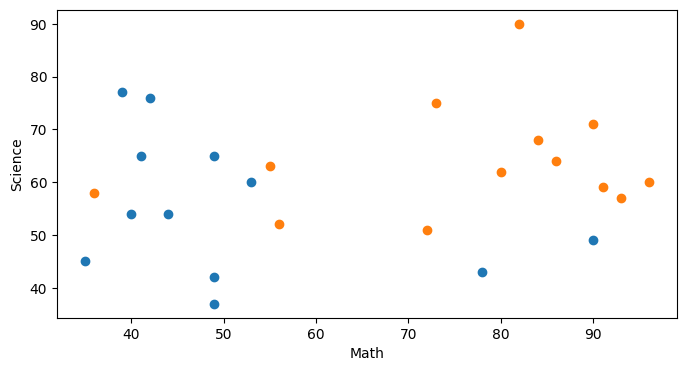

In [6]:
plt.figure(figsize=(8,4))
plt.scatter(df[df['Group']=="A"]["Math"], df[df["Group"]=="A"]["Science"])
plt.scatter(df[df['Group']=="B"]["Math"], df[df["Group"]=="B"]["Science"])
plt.xlabel("Math")
plt.ylabel("Science")
plt.show()

In [11]:
new_point= np.random.randint(35, 99, 2)
new_point

array([38, 91], dtype=int32)

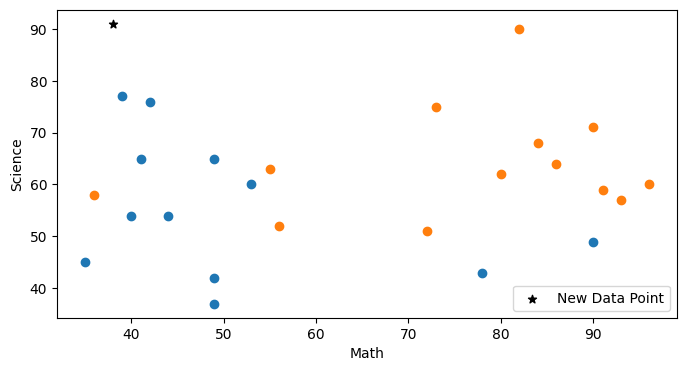

In [13]:
plt.figure(figsize=(8,4))
plt.scatter(df[df['Group']=="A"]["Math"], df[df["Group"]=="A"]["Science"])
plt.scatter(df[df['Group']=="B"]["Math"], df[df["Group"]=="B"]["Science"])
plt.scatter(new_point[0], new_point[1], label="New Data Point", color="black", marker="*")
plt.xlabel("Math")
plt.legend()
plt.ylabel("Science")
plt.show()

In [14]:
distance= np.sqrt(np.square(new_point[0]-df["Math"])+np.square(new_point[1]-df["Science"]))

In [15]:
distance

0     50.219518
1     46.097722
2     37.483330
3     37.054015
4     15.524175
5     28.231188
6     34.438351
7     62.481997
8     26.172505
9     66.843100
10    14.035669
11    55.108983
12    33.060551
13    44.011362
14    51.039201
15    51.429563
16    32.756679
17    42.953463
18    55.713553
19    55.072679
20    65.764732
21    61.911227
22    64.660653
23    52.497619
24    38.483763
dtype: float64

In [16]:
df["Distance"]= distance

In [17]:
df.head()

,SID,Math,Science,Group,Distance
0,1,49,42,A,50.219518
1,2,35,45,A,46.097722
2,3,44,54,A,37.483330
3,4,40,54,A,37.054015
4,5,42,76,A,15.524175


In [19]:
df.sort_values("Distance").head()

,SID,Math,Science,Group,Distance
10,11,39,77,A,14.035669
4,5,42,76,A,15.524175
8,9,41,65,A,26.172505
5,6,49,65,A,28.231188
16,17,55,63,B,32.756679


In [23]:
df.iloc[np.argsort(distance)[:5]]["Group"].value_counts().index[0]

'A'

In [32]:
def predict(new_data_point):
    dist= np.sqrt(np.square(new_data_point[0]-df["Math"])+np.square(new_data_point[1]-df["Science"]))
    output= df.iloc[np.argsort(dist)[:5]]["Group"].value_counts().index[0]
    return f"New student belongs to {output} group"

In [33]:
predict([83,54])

'New student belongs to B group'